In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *
from fastai.column_data import *

###step1：
###step2：
###step3：
###step4：


In [2]:
path='D:\deeplearning_data\\ml-latest-small\\'
###take a look at the data 
ratings = pd.read_csv(path+'ratings.csv')
movies = pd.read_csv(path+'movies.csv')
ratings.loc[ratings.userId==1,:]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [3]:
ratings.groupby('userId').count().head()

,movieId,rating,timestamp
userId,,,
1,20,20,20
2,76,76,76
3,51,51,51
4,204,204,204
5,100,100,100


In [4]:
ratings.head()
ratings.groupby('userId')['rating'].count().head()  ##this group by function works as SQL

userId
1     20
2     76
3     51
4    204
5    100
Name: rating, dtype: int64

##look at data with less NAs

In [5]:
g=ratings.groupby('userId')['rating'].count()
topUsers=g.sort_values(ascending=False)[:15]

g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:15]


In [6]:
topUsers

userId
547    2391
564    1868
624    1735
15     1700
73     1610
452    1340
468    1291
380    1063
311    1019
30     1011
294     947
509     923
580     922
213     910
212     876
Name: rating, dtype: int64

In [7]:
##use inner join to append the number of ratings for that user
ratings.userId.unique()
top_r = ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')
top_r.head()

,userId,movieId,rating,timestamp,rating_r
962,15,1,2.0,997938310,1700
963,15,2,2.0,1134521380,1700
964,15,5,4.5,1093070098,1700
965,15,6,4.0,1040205753,1700
966,15,10,3.0,1093028290,1700


In [8]:
len(top_r.userId.unique())

15

In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [10]:
##focus on only thsoe movies with high response and those users with high reviews
top_r = ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='movieId')

pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,110,260,296,318,356,480,527,589,593,608,1196,1198,1270,2571
userId,,,,,,,,,,,,,,,
15,2.0,3.0,5.0,5.0,2.0,1.0,3.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0
30,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,3.0
73,5.0,4.0,4.5,5.0,5.0,5.0,4.0,5.0,3.0,4.5,4.0,5.0,5.0,5.0,4.5
212,3.0,5.0,4.0,4.0,4.5,4.0,3.0,5.0,3.0,4.0,NaN,NaN,3.0,3.0,5.0
213,3.0,2.5,5.0,NaN,NaN,2.0,5.0,NaN,4.0,2.5,2.0,5.0,3.0,3.0,4.0
294,4.0,3.0,4.0,NaN,3.0,4.0,4.0,4.0,3.0,NaN,NaN,4.0,4.5,4.0,4.5
311,3.0,3.0,4.0,3.0,4.5,5.0,4.5,5.0,4.5,2.0,4.0,3.0,4.5,4.5,4.0
380,4.0,5.0,4.0,5.0,4.0,5.0,4.0,NaN,4.0,5.0,4.0,4.0,NaN,3.0,5.0
452,3.5,4.0,4.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,2.0


In [11]:
##collaborative filtering
val_idxs = get_cv_idxs(len(ratings))
wd=2e-4
n_factors = 50

In [12]:
cf = CollabFilterDataset.from_csv(path, 'ratings.csv', 'userId', 'movieId', 'rating')
learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

In [13]:
learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                                                                                         
    0      0.804193   0.812529  
    1      0.759509   0.781444                                                                                         
    2      0.600925   0.764718                                                                                         



[array([0.76472])]

D:\python\envs\fastai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\python\envs\fastai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


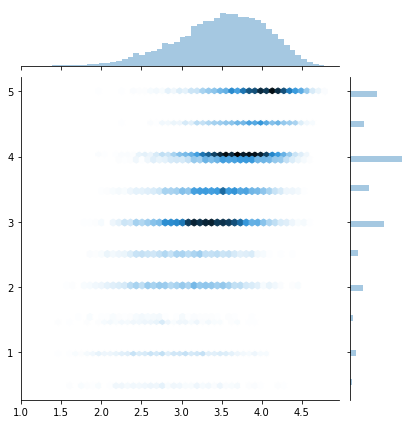

In [14]:
preds = learn.predict()
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);

In [15]:
preds.shape,y.shape

((20000,), (20000,))

In [16]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
movie_names = movies.set_index('movieId')['title'].to_dict()  ##set _index and convert pd.series to a dictinary

In [18]:
g=ratings.groupby('movieId')['rating'].count()
g.head()

movieId
1    247
2    107
3     59
4     13
5     56
Name: rating, dtype: int64

In [19]:
topMovies=g.sort_values(ascending=False).index.values[:3000]  ##top movites with number of count smaller than 3000

In [20]:
topMovies

array([ 356,  296,  318, ...,  149, 1554,   72], dtype=int64)

In [21]:
topMovieIdx = np.array([cf.item2idx[o] for o in topMovies])  ## get it's moveID

In [22]:
m=learn.model; m.cuda()

EmbeddingDotBias(
  (u): Embedding(671, 50)
  (i): Embedding(9066, 50)
  (ub): Embedding(671, 1)
  (ib): Embedding(9066, 1)
)

In [23]:
movie_bias = to_np(m.ib(V(topMovieIdx)))   ##V can convert a numpy arrary into a torch variable
movie_bias
movie_ratings = [(b[0], movie_names[i]) for i,b in zip(topMovies,movie_bias)]   ## get out those bias and the movie names 

In [24]:
sorted(movie_ratings, key=lambda o: o[0])[:15]

[(-0.9668138, 'Battlefield Earth (2000)'),
 (-0.8228798, 'Speed 2: Cruise Control (1997)'),
 (-0.73775345, 'Wild Wild West (1999)'),
 (-0.7358617, 'Anaconda (1997)'),
 (-0.7102556, 'Super Mario Bros. (1993)'),
 (-0.6584832, 'Inspector Gadget (1999)'),
 (-0.64569855, 'Flintstones, The (1994)'),
 (-0.6453942, 'Little Nicky (2000)'),
 (-0.6434711, 'Mighty Morphin Power Rangers: The Movie (1995)'),
 (-0.6388701, 'Batman & Robin (1997)'),
 (-0.61463714, 'Congo (1995)'),
 (-0.61273825, 'Police Academy 6: City Under Siege (1989)'),
 (-0.6122234, "Joe's Apartment (1996)"),
 (-0.5928983, 'House on Haunted Hill (1999)'),
 (-0.5796644, 'Bio-Dome (1996)')]

In [25]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(1.3055742, 'Shawshank Redemption, The (1994)'),
 (1.1251329, 'Godfather, The (1972)'),
 (1.0605068, 'Usual Suspects, The (1995)'),
 (0.9652913, "Schindler's List (1993)"),
 (0.9605611, 'Godfather: Part II, The (1974)'),
 (0.8952968, 'Fargo (1996)'),
 (0.88192207, 'Matrix, The (1999)'),
 (0.8726106, 'Memento (2000)'),
 (0.861377, 'Forrest Gump (1994)'),
 (0.85884845, 'Princess Bride, The (1987)'),
 (0.8583909, 'Silence of the Lambs, The (1991)'),
 (0.8577099, 'Star Wars: Episode IV - A New Hope (1977)'),
 (0.8569704, '12 Angry Men (1957)'),
 (0.8479751, 'Pulp Fiction (1994)'),
 (0.8337648, 'Stand by Me (1986)')]

In [26]:
movie_emb = to_np(m.i(V(topMovieIdx)))
movie_emb.shape

(3000, 50)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
movie_pca = pca.fit(movie_emb.T).components_

In [28]:
fac0 = movie_pca[0]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac0, topMovies)]
fac1 = movie_pca[1]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac1, topMovies)]

In [29]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.120375246, 'Lord of the Rings: The Fellowship of the Ring, The (2001)'),
 (0.09961909, 'Lord of the Rings: The Return of the King, The (2003)'),
 (0.09840064, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (0.096947245, 'Star Wars: Episode IV - A New Hope (1977)'),
 (0.09476876, 'Lord of the Rings: The Two Towers, The (2002)'),
 (0.09350226, 'Spider-Man (2002)'),
 (0.091929205,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (0.09136725, 'Star Wars: Episode VI - Return of the Jedi (1983)'),
 (0.09120114, 'Jurassic Park (1993)'),
 (0.0826817, 'Rocky (1976)')]

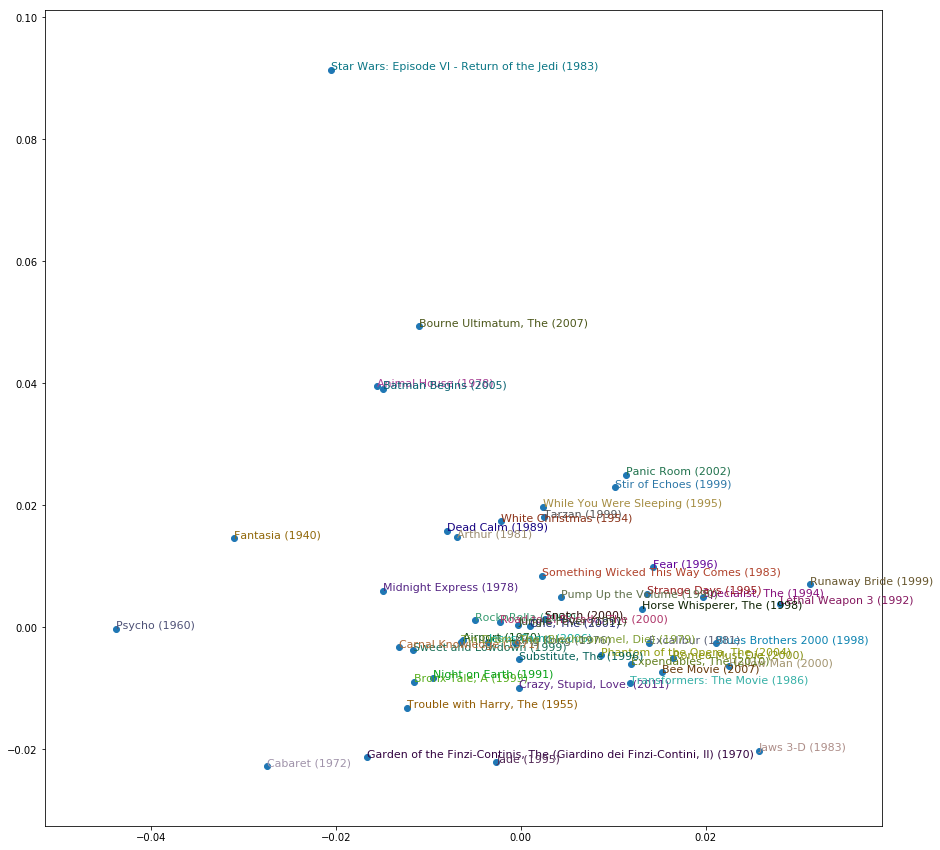

In [30]:
idxs = np.random.choice(len(topMovies), 50, replace=False)
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(topMovies[idxs], X, Y):
    plt.text(x,y,movie_names[i], color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

Now is about collabrative filtering from scrach

In [89]:
a = T([[1.,2],[3,4]])
b = T([[1.,2],[3,4]])
a,b

(
  1  2
  3  4
 [torch.cuda.FloatTensor of size 2x2 (GPU 0)], 
  1  2
  3  4
 [torch.cuda.FloatTensor of size 2x2 (GPU 0)])

In [90]:
a*b


  1   4
  9  16
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

In [33]:
(a*b).sum(1)


  6
 70
[torch.cuda.FloatTensor of size 2 (GPU 0)]

In [34]:
class DotProduct(nn.Module):
    def forward(self, u, m): return (u*m).sum(1)

In [35]:
model=DotProduct()
model(a,b)


  6
 70
[torch.cuda.FloatTensor of size 2 (GPU 0)]

Dot product model

In [36]:

u_uniq= ratings.userId.unique()
type(u_uniq)
u_uniq.shape

(671,)

In [37]:
user2idx = {o:i for i,o in enumerate(u_uniq)}   ##i is index, o is the corresponding number
len(user2idx)  ##671
ratings.userId = ratings.userId.apply(lambda x: user2idx[x])

In [41]:
ratings.head()

,userId,movieId,rating,timestamp
0,0,31,2.5,1260759144
1,0,1029,3.0,1260759179
2,0,1061,3.0,1260759182
3,0,1129,2.0,1260759185
4,0,1172,4.0,1260759205


In [42]:
m_uniq=ratings.movieId.unique()
move2idx = {o:i for i,o in enumerate(m_uniq)}
ratings.movieId = ratings.movieId.apply(lambda x: move2idx[x])

In [43]:
ratings.head()

,userId,movieId,rating,timestamp
0,0,0,2.5,1260759144
1,0,1,3.0,1260759179
2,0,2,3.0,1260759182
3,0,3,2.0,1260759185
4,0,4,4.0,1260759205


In [44]:
n_users=int(ratings.userId.nunique())
n_movies=int(ratings.movieId.nunique())

In [53]:
class EmbeddingDot(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        self.u = nn.Embedding(n_users, n_factors)
        self.m = nn.Embedding(n_movies, n_factors)
        self.u.weight.data.uniform_(0,0.05)
        self.m.weight.data.uniform_(0,0.05)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        u,m = self.u(users),self.m(movies)
        return (u*m).sum(1)

In [45]:
x = ratings.drop(['rating', 'timestamp'],axis=1)
y = ratings['rating'].astype(np.float32)

In [48]:
x.head(),y.head()

(   userId  movieId
 0       0        0
 1       0        1
 2       0        2
 3       0        3
 4       0        4, 0    2.5
 1    3.0
 2    3.0
 3    2.0
 4    4.0
 Name: rating, dtype: float32)

In [61]:
data = ColumnarModelData.from_data_frame(path, val_idxs, x, y, ['userId', 'movieId'], 64)

In [67]:
data.trn_ds.cats

array([[   0,    0],
       [   0,    1],
       [   0,    2],
       ...,
       [ 670, 7005],
       [ 670, 1329],
       [ 670, 1331]], dtype=int64)

In [54]:
model = EmbeddingDot(n_users, n_movies).cuda()

AttributeError: 'Embedding' object has no attribute 'squeeze'

In [58]:
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [75]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                                                                         
    0      1.082626   1.434804  
    1      1.033157   1.434049                                                                                         
    2      0.960275   1.443564                                                                                         



[array([1.44356])]

In [76]:
set_lrs(opt, 0.01)
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                                                                         
    0      0.733691   1.367437  
    1      0.720071   1.35819                                                                                          
    2      0.695764   1.357921                                                                                         



[array([1.35792])]

Add nonlinearality 

In [77]:
min_rating,max_rating = ratings.rating.min(),ratings.rating.max()
min_rating,max_rating

(0.5, 5.0)

In [105]:
def get_emb(ni,nf):
    e = nn.Embedding(ni, nf)
    e.weight.data.uniform_(-0.01,0.01)
    return e

class EmbeddingDotBias(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        (self.u, self.m, self.ub, self.mb) = [get_emb(*o) for o in [             ##* operator will unstructurlize the tuple
            (n_users, n_factors), (n_movies, n_factors), (n_users,1), (n_movies,1)
        ]]
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        um = (self.u(users)* self.m(movies)).sum(1)
        res = um + self.ub(users).squeeze() + self.mb(movies).squeeze()
        res = F.sigmoid(res) * (max_rating-min_rating) + min_rating
        return res

In [106]:

wd=2e-4
model = EmbeddingDotBias(cf.n_users, cf.n_items).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [110]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                                                                         
    0      0.84068    0.838459  
    1      0.812169   0.819608                                                                                         
    2      0.794412   0.806609                                                                                         



[array([0.80661])]

In [87]:
fit(model, data, 3, opt, F.mse_loss)

671 50
9066 50


Try use embedding with nn

In [111]:
class EmbeddingNet(nn.Module):
    def __init__(self, n_users, n_movies, nh=10, p1=0.05, p2=0.5):
        super().__init__()
        (self.u, self.m) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors)]]
        self.lin1 = nn.Linear(n_factors*2, nh)
        self.lin2 = nn.Linear(nh, 1)
        self.drop1 = nn.Dropout(p1)
        self.drop2 = nn.Dropout(p2)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        x = self.drop1(torch.cat([self.u(users),self.m(movies)], dim=1))
        x = self.drop2(F.relu(self.lin1(x)))
        return F.sigmoid(self.lin2(x)) * (max_rating-min_rating+1) + min_rating-0.5

In [112]:
wd=1e-5
model = EmbeddingNet(n_users, n_movies).cuda()
opt = optim.Adam(model.parameters(), 1e-3, weight_decay=wd)

In [113]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                                                                         
    0      0.858564   0.808189  
    1      0.813972   0.793619                                                                                         
    2      0.774778   0.79008                                                                                          



[array([0.79008])]

In [119]:
set_lrs(opt, 1e-3)

In [120]:
fit(model, data, 3, opt, F.mse_loss)

epoch      trn_loss   val_loss                                                                                         
    0      0.751517   0.790945  
    1      0.719041   0.789072                                                                                         
    2      0.713206   0.786627                                                                                         



[array([0.78663])]